# MEPs in diseased vs healthy mice

In [2]:
from tqdm import tqdm
from mepextract.extracting import Extractor
from scipy.signal import find_peaks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import os
import pickle
import json

plt.style.use(['science', 'grid'])

## defining relevant folders and paths

In [7]:
spreadsheet = pd.read_csv('/Users/fomo/Documents/Research/UNIC Research/Motor Evoked Potentials Test/mep_sciatic.csv')

master_folder = '/Volumes/STORAGE 1.0/UNIC Research/Motor Evoked Potentials/motor_evoked_potentials_dataspell/MEPSSEP_raw_data'

spreadsheet

,index,session,animalID,cage,ear,phenotype,phenoCode,subrec,sessionClass,sessionType,currentLevel,isoflo,stim,trials_from,trials_to,notes,session_dates
0,37,2024-03-02 11:08:17,A565,NaN,NaN,5XFAD,2.0,1,MEP,sciatic,1.68,1.60,NaN,1.0,60.0,1 pulse 100us,2024-03-02_11-08-17
1,42,2024-03-02 12:39:39,A580,NaN,NaN,5XFAD,2.0,1,MEP,sciatic,1.20,1.75,NaN,NaN,NaN,21pulses 100us pol black,2024-03-02_12-39-39
2,50,2024-03-02 14:50:32,A563,NaN,NaN,WT,1.0,1,MEP,sciatic,1.05,1.75,NaN,NaN,NaN,50us pulse,2024-03-02_14-50-32
3,51,2024-03-02 15:25:14,A579,NaN,NaN,WT,1.0,1,MEP,sciatic,0.65,NaN,NaN,NaN,NaN,ref on base of tail .65mA 100us single pulse,2024-03-02_15-25-14
4,58,2024-03-02 17:19:10,A585,NaN,NaN,WT,1.0,1,MEP,sciatic,3.00,1.75,NaN,NaN,NaN,100us pulse single iso=1.75% ref on tail,2024-03-02_17-19-10
5,60,2024-03-02 17:25:14,A585,NaN,NaN,WT,1.0,1,MEP,sciatic,5.00,1.50,NaN,NaN,NaN,"50us pulse single, ref on tailbase",2024-03-02_17-25-14
6,61,2024-03-02 17:33:46,A585,NaN,NaN,WT,1.0,1,MEP,sciatic,5.50,1.75,NaN,NaN,NaN,"50us pulse single, ref on tailbase",2024-03-02_17-33-46
7,62,2024-03-02 17:36:12,A585,NaN,NaN,WT,1.0,1,MEP,sciatic,5.50,1.75,NaN,NaN,NaN,50us pulse single ref on tailbase,2024-03-02_17-36-12
8,63,2024-03-02 17:39:35,A585,NaN,NaN,WT,1.0,1,MEP,sciatic,5.50,2.00,NaN,NaN,NaN,200us pulse double iso=2% ref on tailbase,2024-03-02_17-39-35
9,64,2024-03-02 17:48:55,A585,NaN,NaN,WT,1.0,1,MEP,sciatic,5.00,2.00,NaN,NaN,NaN,"200us pulse double, ref on tailbase across ears",2024-03-02_17-48-55


## extracting MEPs for all trials

Processing trials:   0%|          | 0/1 [00:00<?, ?it/s]

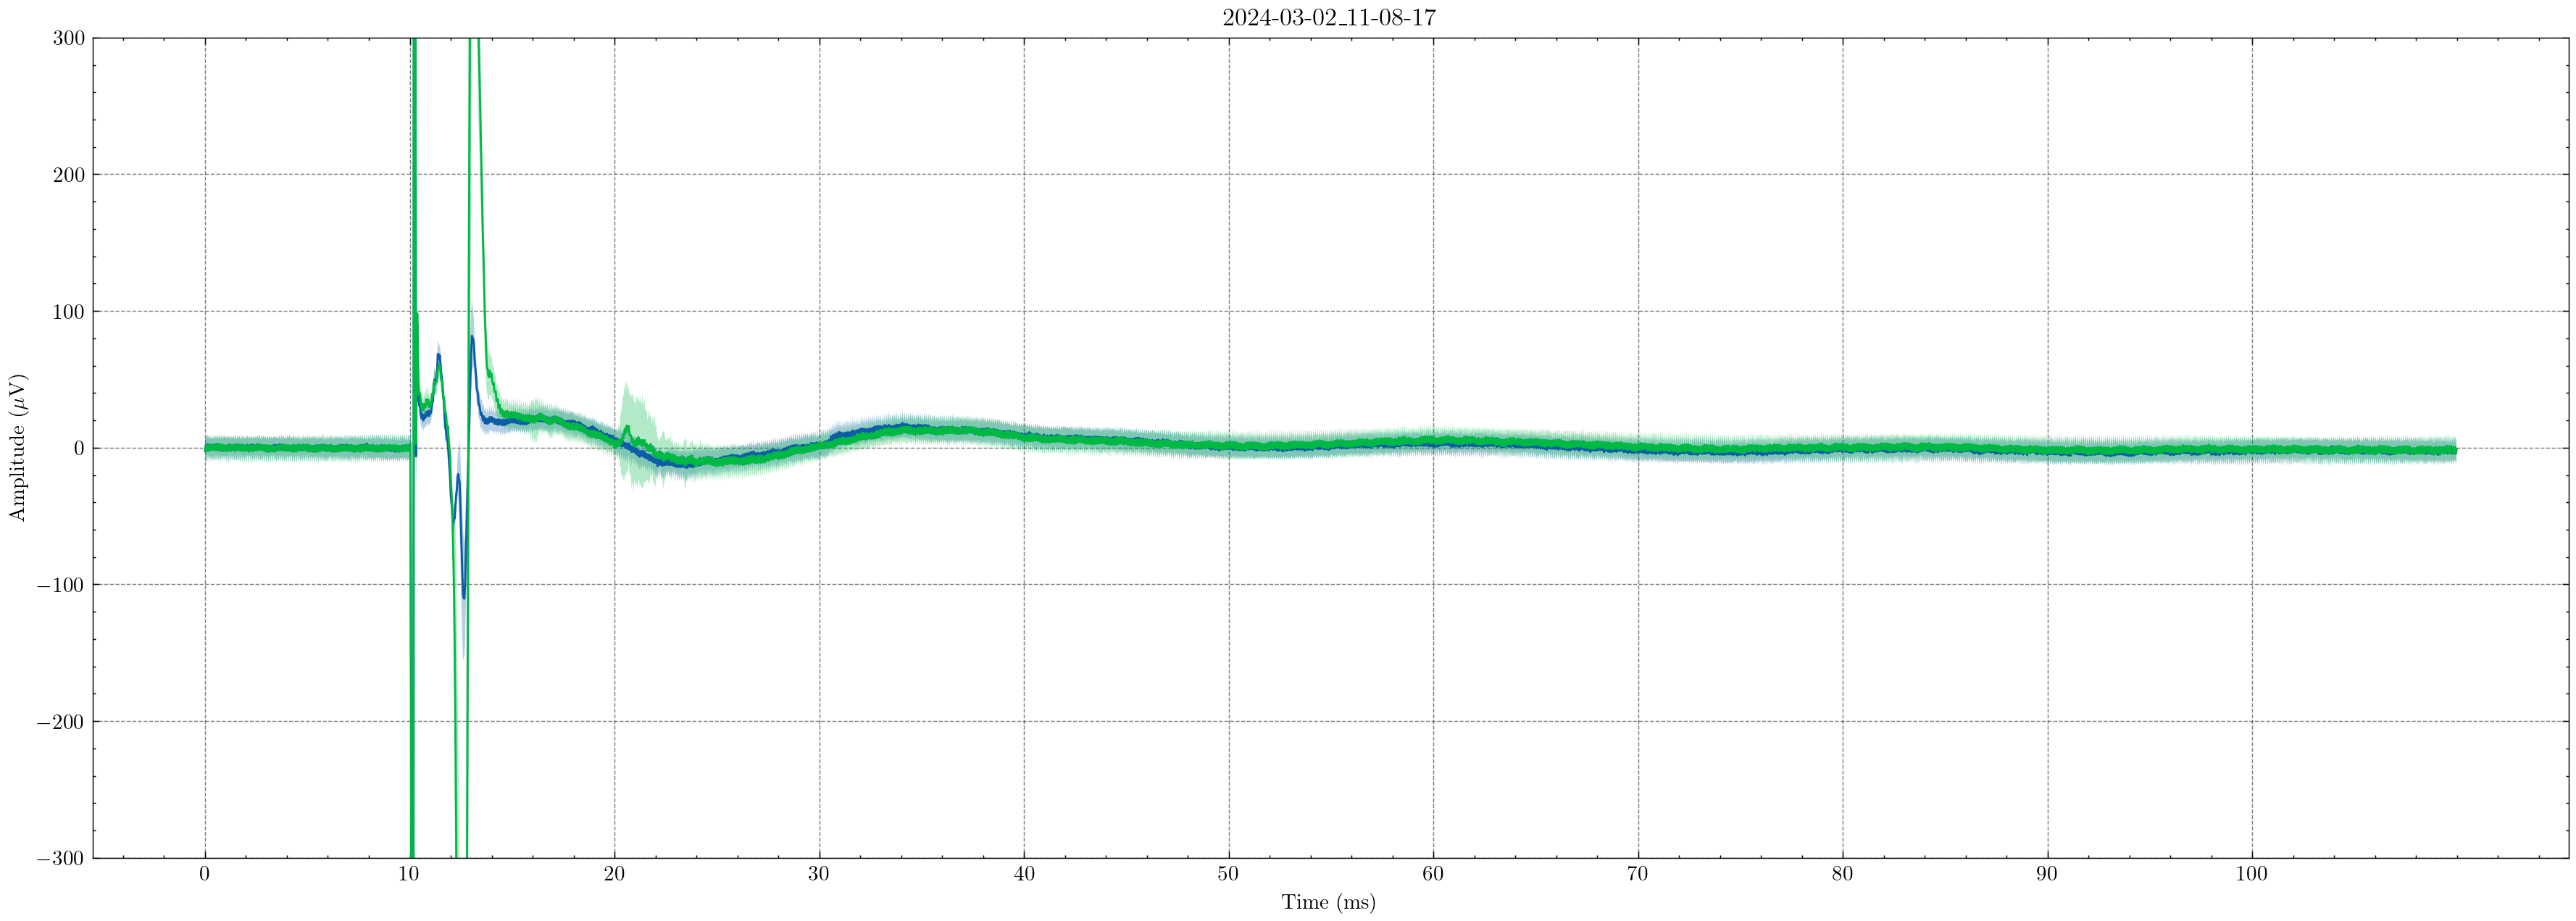

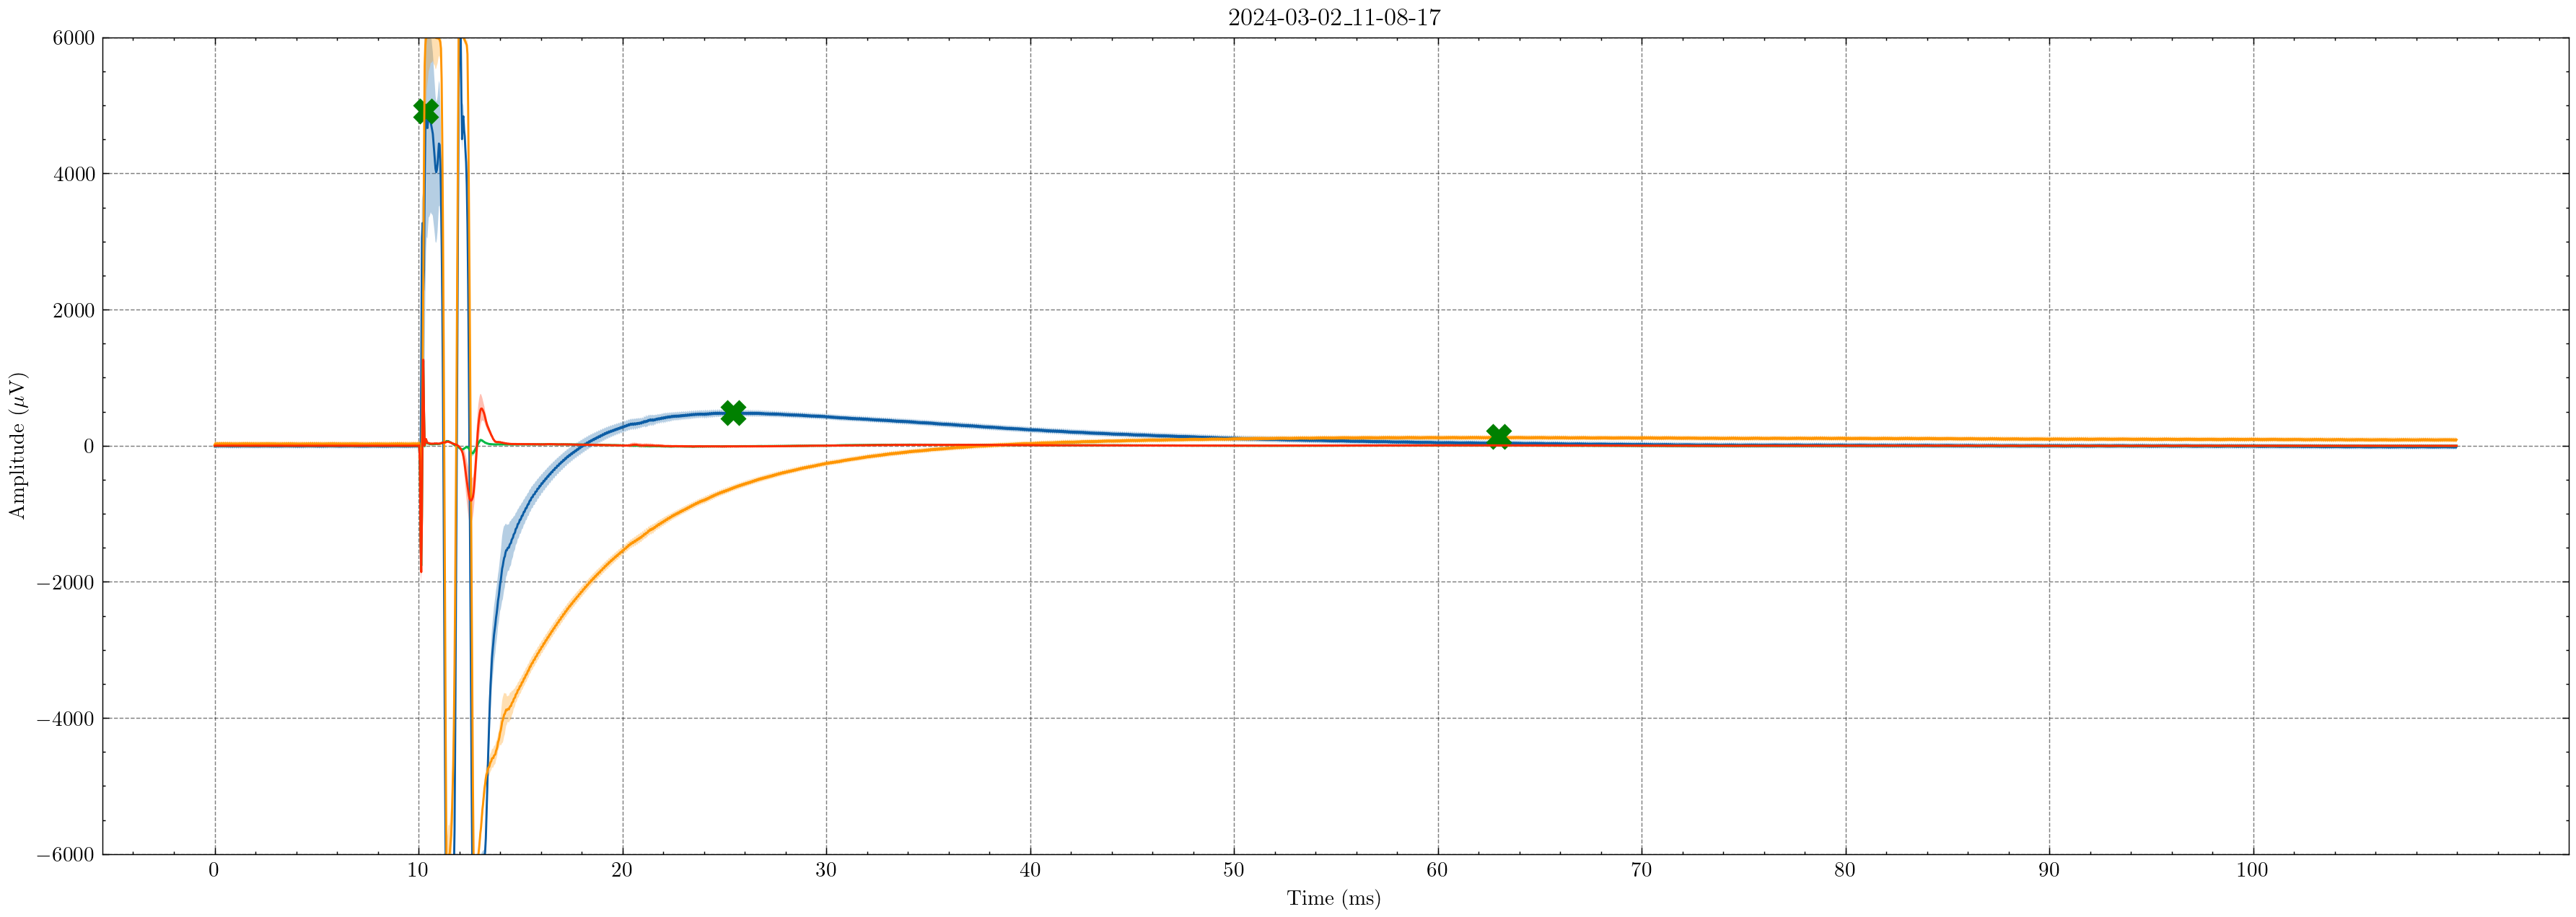

Processing trials: 100%|██████████| 1/1 [00:02<00:00,  2.16s/it]


In [21]:
# number of trials to iterate over
n = len(spreadsheet)

extracted_peaks = []

for i in tqdm(range(1), desc="Processing trials"):
    
    # trial name
    trial = spreadsheet.session_dates[i]
    
    # marking disease status
    if spreadsheet.phenotype[i] == 'WT':
        disease = 0
    else:
        disease = 1

    # defining search parameters
    channels = [5,6,7,8]
    search_parameters = {'height': 50, 'width': 30, 'distance': 45}
    
    # defining extractor object
    extractor = Extractor(master_folder=master_folder, trial=trial, group=disease, recording_channels=channels)
    extractor.pre_stimulus = 300
    extractor.post_stimulus = 3000
    extractor.notes = spreadsheet.loc[i]
    extractor.extract_raw()
    extractor.extract_events(event_channel_number=13)
    extractor.get_event_data()
    extractor.plot_event_average(channels=[6,8], amplitude_range=300)
    extractor.find_meps(peak_parameters=search_parameters, plot=True, show=True, amplitude_range=6000)
    # extracted_peaks.append(extractor.detected_peaks)


In [6]:
extracted_peaks

[{1: [(311, 4915), (763, 489), (1889, 130), (383, 6372)]}]

## plotting detected peaks

In [ ]:
peak_positions_ms = []
peak_heights = []
groups = []

for trial in extracted_peaks:
   for group, peaks in trial.items():
       for position, height in peaks:
           if height < 1000:
               peak_positions_ms.append(position * (1000 / 30000))
               peak_heights.append(height)
               groups.append(group)

# plot with colors based on a variable
plt.figure(figsize=(10, 6), dpi=210)
plt.scatter(peak_positions_ms, peak_heights, c=groups, cmap='viridis', label='Detected Peaks', s=100, alpha = 0.5)
plt.colorbar(label='disease')
plt.xlabel('Time (ms)')
plt.ylabel('Peak Height')
plt.title('Detected Peaks (Sciatic)')
plt.savefig('/Users/fomo/Desktop/peaks.png')
plt.show()

# Generate single large plot

In [ ]:
fig, ax = plt.subplots(n, 1, figsize = (21,7*n), dpi = 210)

for i in tqdm(range(n), desc="Processing trials"):
    
    data_path = os.path.join(master_folder, spreadsheet.session_dates[i], "extracted", "processed_data.pkl")
    peaks_path = os.path.join(master_folder, spreadsheet.session_dates[i], "extracted", "detected_peaks.json")
    
    # temporary data
    with open(data_path, 'rb') as file:
        data = pickle.load(file)
        
    with open(peaks_path, 'rb') as file:
        detected_peaks = json.load(file)
    
    mean_data = np.mean(data[4:8, :, :],axis = 2)
    std_data = np.std(data[4:8, :, :], axis = 2)
    peaks = [peak_position * (1000 / 30000) for _, peak_position, peak_height in detected_peaks if peak_height < 1000]

    # plotting parameters
    time_axis = np.arange(mean_data.shape[1]) * (1000 / 30000)
    tick_positions = np.arange(0, np.max(time_axis), 10)

    for channel_index in range(0,4):

        # plot peaks, mean data and error bars
        upper_bound = mean_data[channel_index] + std_data[channel_index]
        lower_bound = mean_data[channel_index] - std_data[channel_index]
        ax[i].fill_between(time_axis, upper_bound, lower_bound, alpha = 0.3, label =f'Chennal {channel_index + 5}')
        ax[i].plot(time_axis,mean_data[channel_index], label = f'Channel {channel_index + 5}')
        ax[i].plot(peaks, mean_data[channel_index][peaks], "X", label = 'Positive Peaks', color = "purple", ms = 21)

        # plot aesthetics
        ax[i].set_xlabel('Time (ms)')
        ax[i].set_ylabel('Amplitude ($\mu$V)')
        ax[i].set_xticks(tick_positions)
        ax[i].set_ylim(-500,500)
        ax[i].set_title(spreadsheet.session_dates[i])

plt.legend()   
plt.tight_layout()
plt.savefig('/Users/fomo/Desktop/all_sessions.png')